### 離散一様分布の定義

確率変数Xがn個の値（$x_{1}, x_{2}, x_{3}, \dots , x_{n}$）を同じ確率でとりうるとき、Xは離散一様分布に従う。

$$ f(x_{i}) = 1/n $$

In [2]:
# 便利なモジュールを一通りimportしておきます
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

仮想的なサイコロをつくって、その振る舞いを可視化してみます。

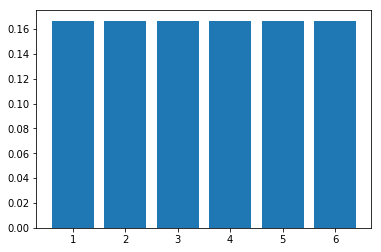

In [3]:
# 確率質量関数（Probability Mass function）をつくって描画します。

# サイコロの取り得る値
roll_options = [1,2,3,4,5,6]

# 確率の総和は1です。
tprob = 1

# 公正なサイコロだったら、どの目も同じ確率で出ます。
prob_roll = tprob / len(roll_options)

# 描画してみます。
uni_plot = plt.bar(roll_options, [prob_roll] * 6)

平均と分散

平均は最大値（b）と最小値（a）を足して2で割ったものです。

$$ \mu = (b+a)/2 $$

分散は次の式で計算できます。

$$ \sigma^2=\frac{(b-a+1)^2 - 1 }{12}$$

--------

Scipyを使うと、この分布を簡単に作る事ができます。

In [4]:
from scipy.stats import randint

# 最大の手前までなので、7です。
low,high = 1,7

# このコードで、離散一様分布の平均と分散を計算できます。
mean,var = randint.stats(low,high)
print('平均= {} 分散={}'.format(mean, var))


平均= 3.5 分散=2.9166666666666665


<Container object of 6 artists>

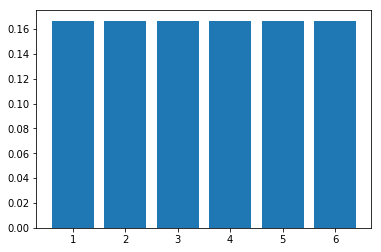

In [5]:
# 確率質量関数（Probably Mass Function）も簡単です。
plt.bar(roll_options,randint.pmf(roll_options,low,high))

#### German Tank Problem

離散一様分布の応用例としては、第2次世界大戦において、イギリスがドイツ軍の戦車の生産台数を推定したGerman Tank Problemが有名です。

Wikipedia（英語） http://en.wikipedia.org/wiki/German_tank_problem

詳しい解説はWikipediaの記事を読んでいただくことにして、簡単例を実際に計算してみましょう。

$$ Population\max = sample \max +  \frac{sample \max}{sample \ size} -1 $$

5台（sample size)の戦車を捕らえ、それぞれのシリアル番号が、3,7,11,16だとすると、sample max=16になります。
最小分散不偏推定量を求めてみます。

In [41]:
tank_estimate = 16 + (16/5) - 1
tank_estimate

18.2

ベイズ統計的なアプローチでは、次のような値になります。

In [42]:
m=16
k=5
tank_b_estimate = (m-1)*( (k-1)/ ( k-2) )
tank_b_estimate

20.0